In [27]:
import pandas as pd
import ast
from scipy.spatial import distance
import seaborn as sns
from bamt.networks.continuous_bn import ContinuousBN
import numpy as np

In [39]:
data = pd.read_csv('results/paper_cec/4 5 0.05 0.1 high exp2.csv')
data

,Number of atr,P_edge,Target assort,Target correlation,Calculated_corr,Time,Deviation_assort
0,5,0.05,0.1,"[0.13647562243052547, 0.039720890668049236, 0....","[0.033436564075273255, 0.1076543501518243, 0.0...",148,0.0
1,5,0.05,0.9,"[0.13647562243052547, 0.039720890668049236, 0....","[0.1831192212290675, 0.0951461962242151, 0.282...",98,0.1
2,5,0.05,0.9,"[0.13647562243052547, 0.039720890668049236, 0....","[0.3576458122725303, 0.10705623850456092, 0.00...",98,0.1
3,5,0.05,0.9,"[0.13647562243052547, 0.039720890668049236, 0....","[0.1586521803748624, 0.034334250379181155, 0.0...",98,0.4
4,5,0.05,0.1,"[0.7671841263228674, 0.8071161103762894, 0.720...","[0.6857881529733174, 0.84856192125948, 0.72664...",281,0.0
...,...,...,...,...,...,...,...
78,5,0.05,0.9,"[0.1056554622985425, 0.09664947313395872, 0.21...","[0.1608018568616098, 0.10961281358901899, 0.08...",200,0.0
79,5,0.05,0.9,"[0.1056554622985425, 0.09664947313395872, 0.21...","[0.27146244805057534, -0.013006891384083783, 0...",200,0.1
80,5,0.05,0.9,"[0.1056554622985425, 0.09664947313395872, 0.21...","[0.24685475660777012, 0.07159142750039009, 0.2...",200,0.5
81,5,0.05,0.1,"[0.8634423676353667, 0.706794907590958, 0.7387...","[0.8785690731370276, 0.7600597759928203, 0.716...",266,0.0


In [40]:
for i in data.index:
    origin_corr = ast.literal_eval(data.loc[i,'Target correlation'])
    calculated_corr = ast.literal_eval(data.loc[i,'Calculated_corr'])
    data.loc[i, 'Corr distance'] = distance.euclidean(origin_corr, calculated_corr)
    

<AxesSubplot: xlabel='Number of atr', ylabel='Corr distance'>

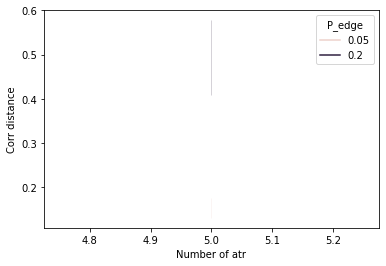

In [41]:
sns.lineplot(x='Number of atr', y='Corr distance', hue='P_edge', data=data)

<AxesSubplot: xlabel='Number of atr', ylabel='Deviation_assort'>

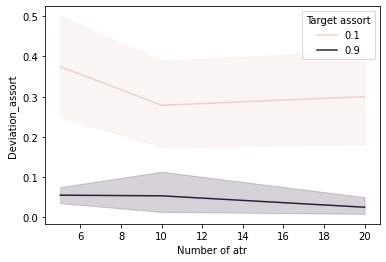

In [15]:
sns.lineplot(x='Number of atr', y='Deviation_assort', hue='Target assort', data=data)

In [29]:
bn = ContinuousBN()
bn.load('results/4 10 0.1 0.9 exp2.json')

True

In [30]:
sample = bn.sample(1000)

100%|██████████| 1000/1000 [00:00<00:00, 2232.32it/s]


In [37]:
sample['A0'].var()

48.56478575632939